In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import random
import gmaps
from scipy.stats import linregress
from pprint import pprint
import os
import csv
import json


# Import API key
from config import weather_key
from config import gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)  

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_key

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [3]:
cities_df = []
cloudiness = []
country = []
date = []
humidity = []
temperature = []
lat = []
lng = []
wind = []

In [4]:
counter = 0
counter2 = 0

print('Beginning Data Retrieval')
print('------------------------')

# use for loop to add city to base url
for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if counter < 50:
        counter += 1
    else:
        counter2 += 1
        counter = 0

    print('Processing record {} of set {} | {}'.format(counter, counter2, city))
    print(query_url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temperature.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        cities_df.append(city)
    except:
        print("City not found!")
        pass


print('Data Retrieval Complete')
print('-------------------------')

Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=punta arenas
Processing record 2 of set 0 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=kapaa
Processing record 3 of set 0 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=hobart
Processing record 4 of set 0 | tra vinh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=tra vinh
Processing record 5 of set 0 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=kaitangata
Processing record 6 of set 0 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=airai
Processing record 7 of set 0 | clyde river

Processing record 3 of set 1 | sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=sao filipe
Processing record 4 of set 1 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=ribeira grande
Processing record 5 of set 1 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=castro
Processing record 6 of set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=atuona
Processing record 7 of set 1 | sambava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=sambava
Processing record 8 of set 1 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=cabo san lucas
Processing record 9 of set 1 | wanaka
http://api.openweathermap.org/da

Processing record 5 of set 2 | dali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=dali
Processing record 6 of set 2 | hammond
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=hammond
Processing record 7 of set 2 | okmulgee
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=okmulgee
Processing record 8 of set 2 | ushtobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=ushtobe
Processing record 9 of set 2 | tucupita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=tucupita
Processing record 10 of set 2 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=ancud
Processing record 11 of set 2 | alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing record 8 of set 3 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=ostrovnoy
Processing record 9 of set 3 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=klaksvik
Processing record 10 of set 3 | sholokhove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=sholokhove
Processing record 11 of set 3 | lokoja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=lokoja
Processing record 12 of set 3 | tateyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=tateyama
Processing record 13 of set 3 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=comodoro rivadavia
Processing record 14 of set 3 | hermanus
http://api.openweathe

Processing record 11 of set 4 | kindu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=kindu
Processing record 12 of set 4 | zalalovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=zalalovo
Processing record 13 of set 4 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=san patricio
Processing record 14 of set 4 | svetlyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=svetlyy
Processing record 15 of set 4 | kinshasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=kinshasa
Processing record 16 of set 4 | porto novo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=porto novo
Processing record 17 of set 4 | araouane
http://api.openweathermap.org/data/2.

Processing record 14 of set 5 | aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=aksarka
Processing record 15 of set 5 | otjimbingwe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=otjimbingwe
Processing record 16 of set 5 | izberbash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=izberbash
Processing record 17 of set 5 | garowe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=garowe
Processing record 18 of set 5 | nadvoitsy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=nadvoitsy
Processing record 19 of set 5 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=vestmannaeyjar
Processing record 20 of set 5 | toliary
http://api.openweathermap.

Processing record 18 of set 6 | dombas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=dombas
Processing record 19 of set 6 | kjollefjord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=kjollefjord
Processing record 20 of set 6 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=illoqqortoormiut
City not found!
Processing record 21 of set 6 | askino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=askino
Processing record 22 of set 6 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=lavrentiya
Processing record 23 of set 6 | juquitiba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=juquitiba
Processing record 24 of set 6 | makung
http://

Processing record 21 of set 7 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=amderma
City not found!
Processing record 22 of set 7 | mozarlandia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=mozarlandia
Processing record 23 of set 7 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=fairbanks
Processing record 24 of set 7 | jambi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=jambi
Processing record 25 of set 7 | caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=caravelas
Processing record 26 of set 7 | port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=port blair
Processing record 27 of set 7 | trunovskoye
http://api.openw

Processing record 24 of set 8 | derzhavinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=derzhavinsk
Processing record 25 of set 8 | novopokrovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=novopokrovka
Processing record 26 of set 8 | burica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=burica
City not found!
Processing record 27 of set 8 | okato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=okato
Processing record 28 of set 8 | estevan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=estevan
Processing record 29 of set 8 | carlsbad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=carlsbad
Processing record 30 of set 8 | sahuaripa
http://api.openweather

Processing record 26 of set 9 | tembisa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=tembisa
Processing record 27 of set 9 | dese
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=dese
Processing record 28 of set 9 | athabasca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=athabasca
Processing record 29 of set 9 | hauterive
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=hauterive
Processing record 30 of set 9 | lemoore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=lemoore
Processing record 31 of set 9 | paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=paamiut
Processing record 32 of set 9 | flinders
http://api.openweathermap.org/data/2.5/weather?unit

Processing record 29 of set 10 | maputo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=maputo
Processing record 30 of set 10 | pingliang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=pingliang
Processing record 31 of set 10 | anloga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=anloga
Processing record 32 of set 10 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=richards bay
Processing record 33 of set 10 | ponta delgada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=ponta delgada
Processing record 34 of set 10 | ruangwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=ruangwa
Processing record 35 of set 10 | plouzane
http://api.openweatherma

Processing record 31 of set 11 | bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=bud
Processing record 32 of set 11 | puerto del rosario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=puerto del rosario
Processing record 33 of set 11 | malakal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=malakal
Processing record 34 of set 11 | mildura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=mildura
Processing record 35 of set 11 | wattegama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=wattegama
Processing record 36 of set 11 | tamandare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b494ede09c465ef204ca9a34c51dc2b&q=tamandare
Processing record 37 of set 11 | castellammare del golfo
http://ap

In [11]:
city_weather = {
    "City": cities_df,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temperature": temperature,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind}
weather_df = pd.DataFrame(city_weather)
weather_df.count()

City           565
Cloudiness     565
Country        565
Date           565
Humidity       565
Temperature    565
Lat            565
Lng            565
Wind Speed     565
dtype: int64

In [13]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Temperature,Lat,Lng,Wind Speed
0,punta arenas,100,CL,1580144148,47,59.00,-53.15,-70.92,11.41
1,kapaa,20,US,1580143990,78,73.40,22.08,-159.32,11.41
2,hobart,100,AU,1580144084,48,60.80,-42.88,147.33,14.99
3,tra vinh,80,VN,1580144379,82,76.21,9.93,106.35,5.73
4,kaitangata,96,NZ,1580144158,88,56.46,-46.28,169.85,8.03


In [14]:
city_list = zip(cities_df,cloudiness,country,date,humidity,temperature,lat,lng)
output_file = os.path.join("cities_data")

with open(output_file, 'w') as datafile:
    weather_df.to_csv(output_file)

In [15]:
date_var =datetime.datetime.fromtimestamp(
        int(weather_df['Date'][0])
    ).strftime('%m/%d/%Y')

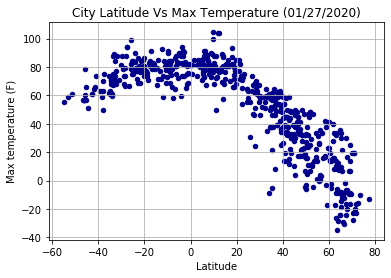

In [23]:
weather_df.plot(kind='scatter', x='Lat', y='Temperature', c='DarkBlue')
plt.title('City Latitude Vs Max Temperature ({})'.format(date_var) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("Latitude vs Temperature.png")

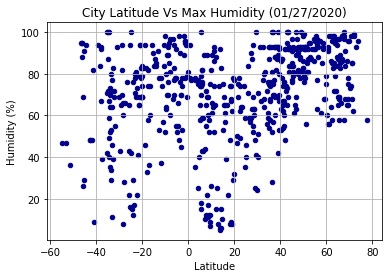

In [24]:
weather_df.plot(kind='scatter',x='Lat',y='Humidity', c='DarkBlue')
plt.title('City Latitude Vs Max Humidity ({})'.format(date_var) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("Latitude Vs Humidity.png")
plt.show()

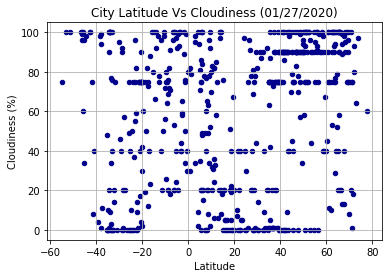

In [25]:
weather_df.plot(kind='scatter',x='Lat',y='Cloudiness', c='DarkBlue')
plt.title('City Latitude Vs Cloudiness ({})'.format(date_var) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("LatitudeVsCloudiness.png")
plt.show()

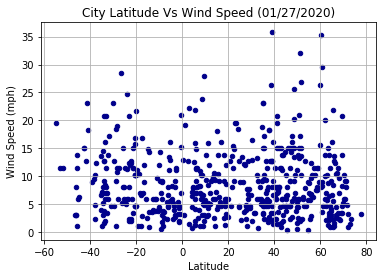

In [26]:
weather_df.plot(kind='scatter',x='Lat',y='Wind Speed', c='DarkBlue')
plt.title('City Latitude Vs Wind Speed ({})'.format(date_var) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("Latitude vs WindSpeed.png")

In [ ]:
#LINEAR REGRESSION

In [30]:
nothern_data = weather_df.loc[weather_df["Lat"] >= 0.0]
nothern_data.reset_index(inplace=True)
southern_data = weather_df.loc[weather_df["Lat"] < 0.0]
southern_data.reset_index(inplace=True)

In [31]:
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig("Temperature vs Latitude.png")
    plt.show()

The r-squared is: -0.8901904519056738


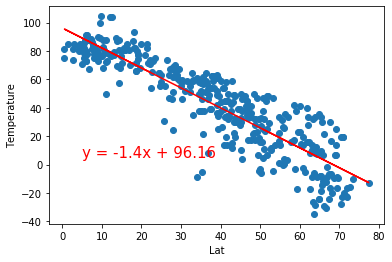

In [35]:
xlbl = "Lat"
ylbl = "Temperature"
lblpos = (5,5)
plotLinearRegression(nothern_data[xlbl],nothern_data[ylbl],xlbl,ylbl,lblpos,5)

The r-squared is: 0.5228626116860936


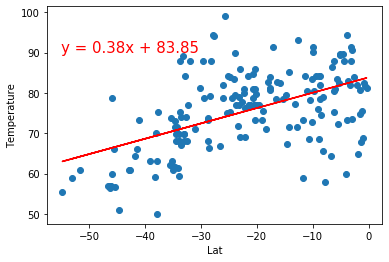

In [36]:
xlbl = "Lat"
ylbl = "Temperature"
lblpos = (-55,90)
plotLinearRegression(southern_data[xlbl],southern_data[ylbl],xlbl,ylbl,lblpos,6)

The r-squared is: 0.5073932926896485


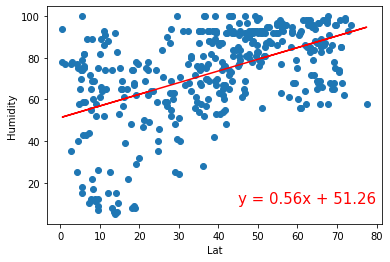

In [38]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(nothern_data[xlbl],nothern_data[ylbl],xlbl,ylbl,lblpos,7)

The r-squared is: 0.2597301336851477


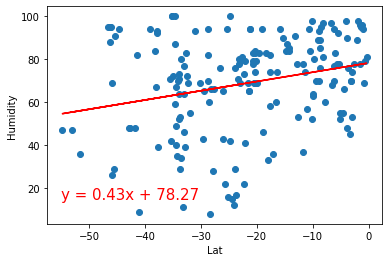

In [39]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern_data[xlbl],southern_data[ylbl],xlbl,ylbl,lblpos,8)

The r-squared is: 0.34280517761456286


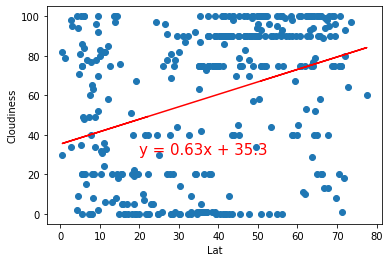

In [40]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,30)
plotLinearRegression(nothern_data[xlbl],nothern_data[ylbl],xlbl,ylbl,lblpos,9)

The r-squared is: 0.09842306387625241


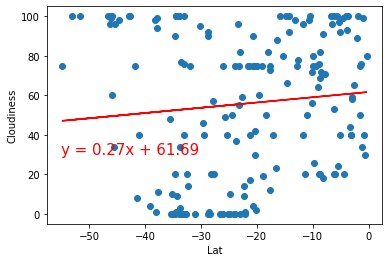

In [41]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,30)
plotLinearRegression(southern_data[xlbl],southern_data[ylbl],xlbl,ylbl,lblpos,10)

The r-squared is: -0.001617643939788285


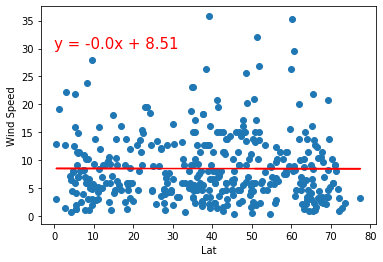

In [42]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(nothern_data[xlbl],nothern_data[ylbl],xlbl,ylbl,lblpos,11)

The r-squared is: -0.001617643939788285


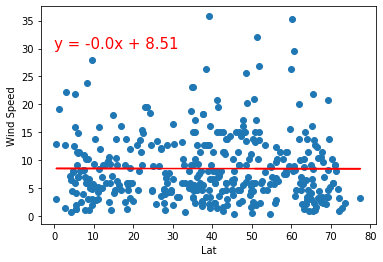

In [43]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(nothern_data[xlbl],nothern_data[ylbl],xlbl,ylbl,lblpos,11)

In [44]:
#VACATIONS HOMEWORK

In [45]:
humidity = weather_df["Humidity"].astype(float)
max_humidity = humidity.max()
locations = weather_df[["Lat", "Lng"]]

In [47]:
fig = gmaps.figure()
heat_map = gmaps.heatmap_layer(locations, weights=humidity,dissipating=False, max_intensity=max_humidity,point_radius=3)
fig.add_layer(heat_map)
fig

Figure(layout=FigureLayout(height='420px'))

In [50]:
ncity_df = weather_df.loc[(weather_df["Temperature"] > 70) & (weather_df["Temperature"] < 80) & (weather_df["Cloudiness"] == 0), :]
ncity_df = ncity_df.dropna(how='any')
ncity_df.reset_index(inplace=True)
del ncity_df['index']
ncity_df.head()

,City,Cloudiness,Country,Date,Humidity,Temperature,Lat,Lng,Wind Speed
0,carnarvon,0,AU,1580144155,100,75.20,-24.87,113.63,11.41
1,ouadda,0,CF,1580144107,22,75.22,8.08,22.40,6.87
2,sao filipe,0,CV,1580144145,53,76.75,14.90,-24.50,18.03
3,dwarka,0,IN,1580144121,74,70.99,22.24,68.97,15.41
4,busselton,0,AU,1580144146,34,73.99,-33.65,115.33,8.43


In [51]:
hotel_df = []

for i in range(len(ncity_df)):
    lat = ncity_df.loc[i]['Lat']
    lng = ncity_df.loc[i]['Lng']
    params = {
        "location": f"{lat},{lng}",
        "radius": 5000,
        "types" : "hotel",
        "key": gkey}
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    requested = requests.get(base_url, params=params)
    json = requested.json()
    try:
        hotel_df.append(json['results'][0]['name'])
    except:
        hotel_df.append("")
ncity_df["Hotel Name"] = hotel_df
ncity_df = ncity_df.dropna(how='any')
ncity_df.head()

,City,Cloudiness,Country,Date,Humidity,Temperature,Lat,Lng,Wind Speed,Hotel Name
0,carnarvon,0,AU,1580144155,100,75.20,-24.87,113.63,11.41,Carnarvon
1,ouadda,0,CF,1580144107,22,75.22,8.08,22.40,6.87,Ouadda
2,sao filipe,0,CV,1580144145,53,76.75,14.90,-24.50,18.03,Sao Filipe
3,dwarka,0,IN,1580144121,74,70.99,22.24,68.97,15.41,Dwarka
4,busselton,0,AU,1580144146,34,73.99,-33.65,115.33,8.43,Busselton


In [54]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in ncity_df.iterrows()]
locations = hotel_df[["Lat", "Lng"]]

NameError: name 'hotel_data' is not defined

In [ ]:
markers = gmaps.marker_layer(locations)
fig.add_layer(markers)
fig